In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
iris_dataset=pd.read_csv('iris.csv')
iris_dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

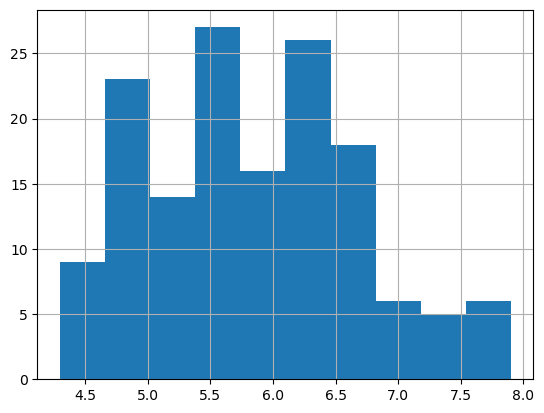

In [9]:
iris_dataset['sepal_length'].hist()

<AxesSubplot:>

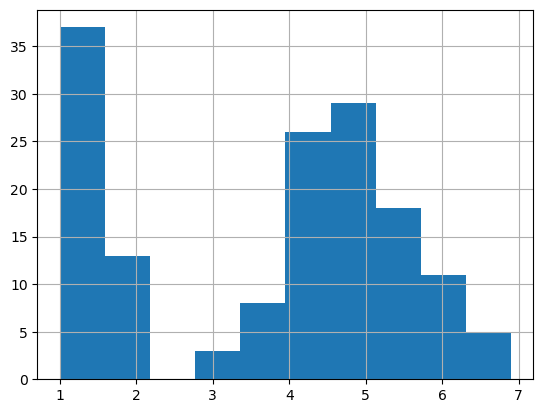

In [10]:
iris_dataset['petal_length'].hist()

<AxesSubplot:>

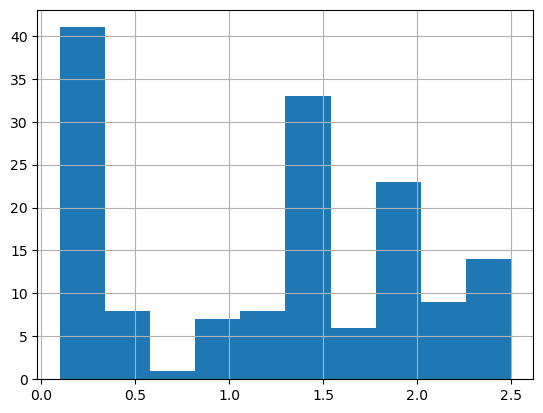

In [11]:
iris_dataset['petal_width'].hist()

<AxesSubplot:>

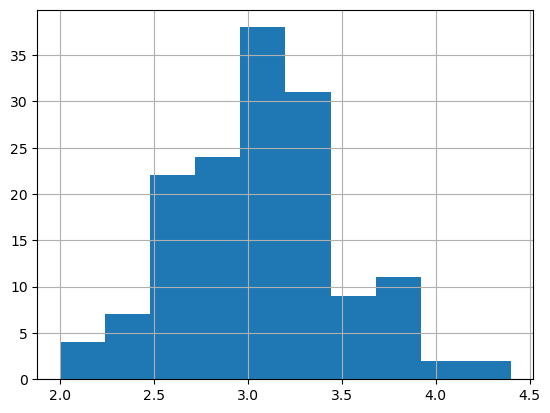

In [12]:
iris_dataset['sepal_width'].hist()

In [13]:
iris_dataset['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [14]:
colors=['blue','orange','violet']
species=['setosa','versicolor','virginica']

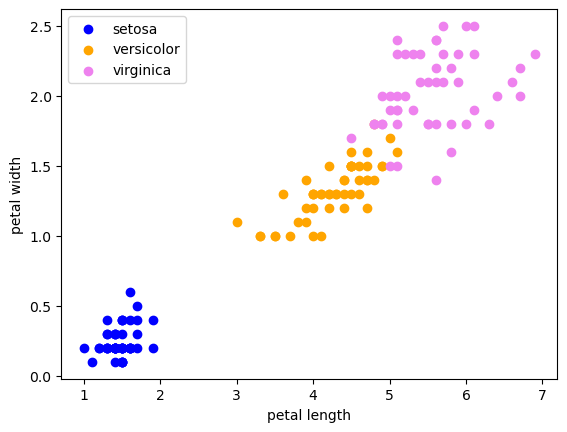

In [16]:
for i in range (3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

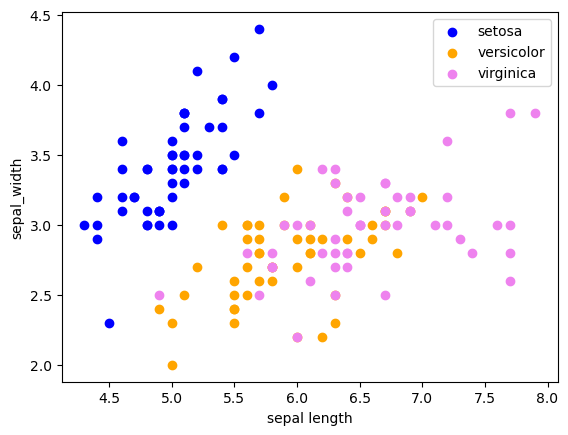

In [17]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal_width')
    plt.legend()

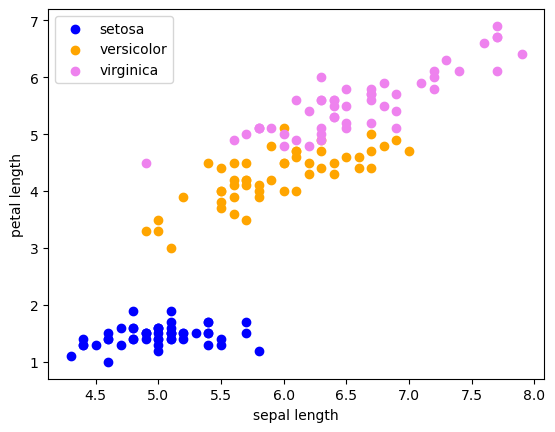

In [18]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.legend()

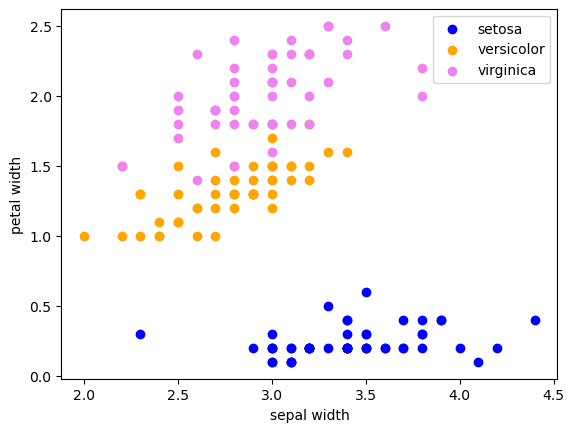

In [19]:
for i in range(3):
    x=iris_dataset[iris_dataset['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('sepal width')
    plt.ylabel('petal width')
    plt.legend()

In [20]:
iris_dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

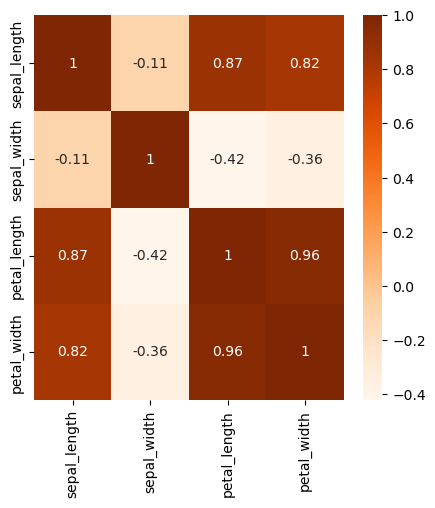

In [22]:
correlation=iris_dataset.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(correlation,annot=True,ax=ax,cmap='Oranges')

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
iris_dataset['species']=le.fit_transform(iris_dataset['species'])
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [29]:
from sklearn.model_selection import train_test_split
x=iris_dataset.drop(columns=['species'])
y=iris_dataset['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 96.0
